In [1]:
import tensorflow as tf

tape_gradient() 는 자동 미분 기능을 수행한다.  
$ 임의로 2w^2 +5 $ 라는 식을 세우고 w 에 대하여 미분한다

In [2]:
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z


Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-02-03 22:09:14.421935: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-03 22:09:14.422126: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


gradients 를 출력하면 w에 대해 미분한 값이 저장됨

In [3]:
with tf.GradientTape() as tape:
    z=f(w)

gradients = tape.gradient(z, [w])
print(gradients)


[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 2. 자동 미분을 이용한 선형 회귀 구현

In [4]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.)
b = tf.Variable(1.)

@tf.function
def hypothesis(x):
    return w*x+b

x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


2022-02-03 22:11:18.002646: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-03 22:11:18.002796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [5]:
# 평균 제곱 오차를 손실함수로 정의
@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

x = [1,2,3,4,5,6,7,8,9]
y = [11,22,33,44,53,66,77,87, 95]

# 옵티마이저는 경사 하강법을 사용하고, 학습률은 0.01 을 사용한다
optimizer = tf.optimizers.SGD(0.01)

# 약 300번 간 경사 하강법을 수행한다
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x 에 대한 예측값을 y_pred
        y_pred = hypothesis(x)
        
        # 평균 제곱 오차율 계산
        cost = mse_loss(y_pred, y)
    
    # 손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [w,b])
    
    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w,b]))
    
    if i%10 == 0 :
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

2022-02-03 22:15:13.037817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-03 22:15:13.062276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-03 22:15:13.251710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-03 22:15:13.296251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198742
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168355
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

w, b 의 값이 업데이트됨에 따라 cost 가 줄어든다

In [6]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


## 3. 케라스로 구현하는 선형 회귀

/Users/sunny/miniforge3/envs/py38/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2022-02-03 22:18:41.674452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/300
1/1 [==============================] - 1s 606ms/step - loss: 3817.3567 - mse: 3817.3567
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 470.7734 - mse: 470.7734
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 59.0003 - mse: 59.0003
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 8.3336 - mse: 8.3336
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 2.0982 - mse: 2.0982
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 1.3298 - mse: 1.3298
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2341 - mse: 1.2341
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2212 - mse: 1.2212
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2184 - mse: 1.2184
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2170 - mse: 1.2170
Epoch 11/300
1/1 [==============================] - 0s 6ms/step -

2022-02-03 22:18:46.564281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


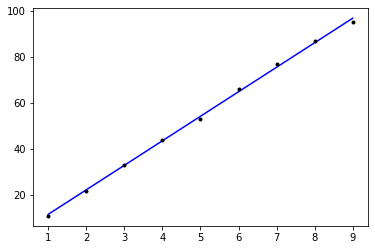

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1,2,3,4,5,6,7,8,9]
y = [11,22,33,44,53,66,77,87,95]

model = Sequential()

model.add(Dense(1, input_dim=1, activation='linear'))

sgd = optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

model.fit(x,y,epochs=300)

plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [10]:
model.predict([9.])

array([[96.84336]], dtype=float32)